In [163]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F

In [3]:
words = open('names.txt','r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
min(len(w) for w in words)

2

In [7]:
max(len(w) for w in words)

15

In [95]:
char_set = {}
number_set = {}
for i,char in enumerate(sorted(set(''.join(words)))):
    char_set[char] = i+1
    number_set[i+1] = char
char_set["."], number_set[0] = 0, "."

In [96]:
hash_map = torch.zeros((27,27), dtype=torch.int32)
for w in words:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars,chars[1:]):
        ch1,ch2 = char_set[ch1],char_set[ch2]
        hash_map[ch1, ch2] += 1

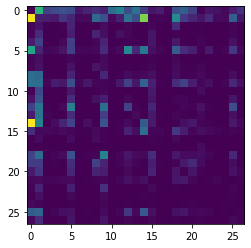

In [57]:
plt.imshow(hash_map)

In [83]:
p = hash_map[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [84]:
q = torch.Generator().manual_seed(23452345)

torch.multinomial(p,num_samples=20, replacement=True, generator=q)

tensor([ 3,  8, 11, 13, 11,  9,  1, 13, 18, 13, 18, 13,  5, 15, 25,  1, 19, 22,
         8, 10])

In [145]:
P = (hash_map+1).float()
P /= P.sum(1,keepdim=True)

In [146]:
## BRODCASTING RULES
q = torch.Generator().manual_seed(2345234545)
ix = 0
for i in range(5):
    out = []
    while True:
        ## trained model
        p = hash_map[ix].float()
        p /= p.sum()
        p = P[ix]
        ## untrained model
        pp = torch.ones(27)/27
        ix = torch.multinomial(p,num_samples=1, replacement=True, generator=q).item()
        out.append(number_set[ix])
        if ix == 0:
            break
    print("".join(out))

bre.
razee.
dahiahakabe.
maigsushen.
jammah.


In [152]:
neg_log_like=  0.0
n=0
for w in ["lame"]:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars,chars[1:]):
        ix1,ix2 = char_set[ch1],char_set[ch2]
        prob = P[ix1,ix2]
        neg_log_like += -math.log(prob)
        n+=1
        #print(f"{ch1}{ch2} : {-math.log(prob) =: .4f}")
print(f"{neg_log_like/n = }")

neg_log_like/n = 2.290574737491098


In [191]:
## create the training set
xs,ys = [],[]
for w in words[:1]:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars,chars[1:]):
        ix1,ix2 = char_set[ch1],char_set[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [192]:
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [193]:
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [181]:
w = torch.randn(27,27)
logits = (xenc @ w)
## softmax --> 
counts = logits.exp()
probs = counts / counts.sum(1,keepdim=True)

In [186]:
probs

tensor([[0.0096, 0.0097, 0.0809, 0.0104, 0.0163, 0.0184, 0.0167, 0.0037, 0.0210,
         0.0268, 0.0778, 0.0134, 0.0175, 0.0335, 0.1538, 0.0362, 0.0057, 0.0018,
         0.0083, 0.0745, 0.1516, 0.0287, 0.0260, 0.0535, 0.0282, 0.0198, 0.0563],
        [0.0084, 0.0081, 0.0162, 0.0113, 0.0205, 0.0888, 0.0298, 0.0092, 0.0471,
         0.0032, 0.0060, 0.0529, 0.0656, 0.2540, 0.0437, 0.0532, 0.0092, 0.0307,
         0.0138, 0.0221, 0.0072, 0.0068, 0.0160, 0.0083, 0.0049, 0.0091, 0.1538],
        [0.0089, 0.0014, 0.0176, 0.0131, 0.0083, 0.0046, 0.0106, 0.0228, 0.0050,
         0.0250, 0.0252, 0.0033, 0.0220, 0.0256, 0.0528, 0.0105, 0.0336, 0.1218,
         0.0039, 0.1832, 0.0147, 0.0017, 0.0168, 0.0008, 0.0057, 0.0578, 0.3032],
        [0.0089, 0.0014, 0.0176, 0.0131, 0.0083, 0.0046, 0.0106, 0.0228, 0.0050,
         0.0250, 0.0252, 0.0033, 0.0220, 0.0256, 0.0528, 0.0105, 0.0336, 0.1218,
         0.0039, 0.1832, 0.0147, 0.0017, 0.0168, 0.0008, 0.0057, 0.0578, 0.3032],
        [0.0851, 0.0085,